In [31]:
#Контектс задачи: 
# Студия по разработки мобильных игр, создала прототип будующей игры. С целью изучения рентабельности,
# студией сделано 2 видеоролика (Геймплейна) будующей игры (А и В). Оба Гемплейна были залиты в GooglePlay. В результате оба
# Геймплейна показали определенные результаты. Вам необходимо определить какой из Гейплейнов является лучшим?

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('ad.csv')

In [34]:
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [35]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)

In [36]:
summary_df 

,action
ad_id,
A,304
B,372


In [37]:
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id')

In [38]:
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))

In [39]:
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


In [40]:
#Промежуточный результат:
#Полученные данные показывают, что результат тестирования второго Гейплейна (B) лучше.
#372>304

In [41]:
# Отрисовка гистограммы полученных результатов

Text(0, 0.5, 'Коэф-т конверсии')

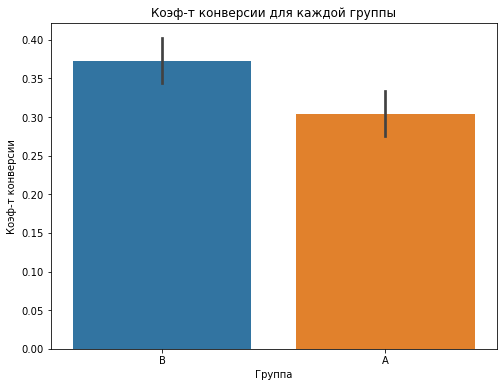

In [42]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

In [43]:
# Необходимо проверить гипотезу полученных результатов

In [46]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [47]:
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

In [48]:
nobs = [control_results.count(), test_results.count()]

In [59]:
nobs

[1000, 1000]

In [54]:
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


In [55]:
alpha = 0.05

In [56]:
print(pval < alpha)

True


In [57]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

In [58]:
print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


In [ ]:
#Статистический анализ показал, что Гейплей группы (В) даст лучший результат. 